In [324]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# **Exercise: Data Preparation**

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Encoding
- Scaling
- Regularization
<br><br>

**Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

**Lakukan tahapan ini pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Splitting dataset dengan proporsi 80:20 dan random_state = 2020
- Gunakan ColumnTransformer untuk encoding.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.
- Lakukan fitting model dan evaluasi dengan metode Lasso pada data yang telah dilakukan preprocessing.

Keterangan features:
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

In [325]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [326]:
df = df[['Price','Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname']]
df.head()

,Price,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,1480000.0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan
1,1035000.0,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan
2,1465000.0,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan
3,850000.0,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan
4,1600000.0,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         13580 non-null  float64
 1   Suburb        13580 non-null  object 
 2   Rooms         13580 non-null  int64  
 3   Type          13580 non-null  object 
 4   Method        13580 non-null  object 
 5   Distance      13580 non-null  float64
 6   Bedroom2      13580 non-null  float64
 7   Bathroom      13580 non-null  float64
 8   Car           13518 non-null  float64
 9   Landsize      13580 non-null  float64
 10  BuildingArea  7130 non-null   float64
 11  YearBuilt     8205 non-null   float64
 12  CouncilArea   12211 non-null  object 
 13  Regionname    13580 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.5+ MB


In [328]:
df.isna().sum()

Price              0
Suburb             0
Rooms              0
Type               0
Method             0
Distance           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Regionname         0
dtype: int64

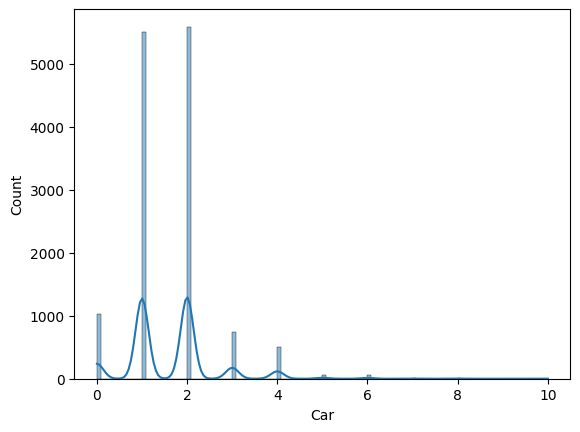

In [329]:
sns.histplot(df['Car'], kde=True)
plt.show()

In [330]:
df['Car'].fillna(round(df['Car'].median()),inplace=True)

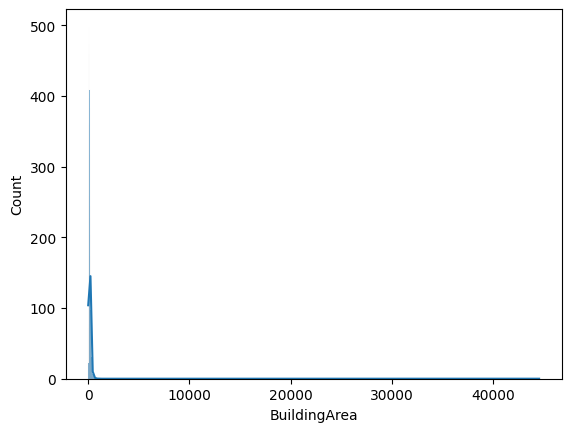

In [331]:
sns.histplot(df['BuildingArea'], kde=True)
plt.show()

In [332]:
df['BuildingArea'].fillna(round(df['BuildingArea'].median(),2),inplace=True)

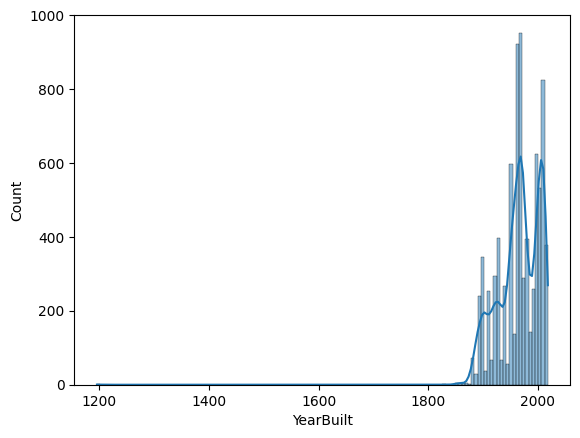

In [333]:
sns.histplot(df['YearBuilt'], kde=True)
plt.show()

In [334]:
df['YearBuilt'].fillna(round(df['YearBuilt'].median()),inplace=True)

In [335]:
df['CouncilArea'].fillna(df['CouncilArea'].mode()[0],inplace=True)

In [336]:
df.duplicated().sum()

21

In [337]:
df.drop_duplicates(inplace=True)

# EDA

In [338]:
Y = df['Price']
Y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [339]:
X = df.drop(columns=['Price'])
X.head()

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,126.0,1970.0,Yarra,Northern Metropolitan
1,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan
2,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan
3,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,126.0,1970.0,Yarra,Northern Metropolitan
4,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan


In [340]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2020)

In [341]:
X_train.head()

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
7097,Kingsville,2,h,SP,7.8,2.0,2.0,1.0,180.0,179.0,2011.0,Maribyrnong,Western Metropolitan
8831,Hawthorn,3,u,S,5.3,3.0,1.0,1.0,1079.0,90.0,1940.0,Boroondara,Southern Metropolitan
11883,Balwyn,5,h,S,7.9,5.0,4.0,2.0,729.0,1.0,2012.0,Boroondara,Southern Metropolitan
6750,Aberfeldie,2,h,SP,9.1,2.0,1.0,2.0,0.0,103.0,1990.0,Moonee Valley,Western Metropolitan
8263,Preston,3,h,S,8.8,3.0,2.0,2.0,472.0,123.0,1965.0,Darebin,Northern Metropolitan


In [342]:
X_train.nunique()

Suburb           310
Rooms              9
Type               3
Method             5
Distance         201
Bedroom2          12
Bathroom           9
Car               11
Landsize        1364
BuildingArea     545
YearBuilt        138
CouncilArea       32
Regionname         8
dtype: int64

In [343]:
transformer = ColumnTransformer([('onehot',OneHotEncoder(),['Type']),
                  ('binary',BinaryEncoder(),['Suburb','Method','CouncilArea','Regionname']),
                  ('robust', RobustScaler(), ['Rooms','Distance', 'Bedroom2', 'Bathroom','Car', 'Landsize', 'BuildingArea', 'YearBuilt'])
                  ], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(), ['Type']),
                                ('binary', BinaryEncoder(),
                                 ['Suburb', 'Method', 'CouncilArea',
                                  'Regionname']),
                                ('robust', RobustScaler(),
                                 ['Rooms', 'Distance', 'Bedroom2', 'Bathroom',
                                  'Car', 'Landsize', 'BuildingArea',
                                  'YearBuilt'])])

In [344]:
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [345]:
onehot = list(transformer.transformers_[0][1].get_feature_names_out())
onehot

['Type_h', 'Type_t', 'Type_u']

In [346]:
binary = list(transformer.transformers_[1][1].get_feature_names_out())
binary

['Suburb_0',
 'Suburb_1',
 'Suburb_2',
 'Suburb_3',
 'Suburb_4',
 'Suburb_5',
 'Suburb_6',
 'Suburb_7',
 'Suburb_8',
 'Method_0',
 'Method_1',
 'Method_2',
 'CouncilArea_0',
 'CouncilArea_1',
 'CouncilArea_2',
 'CouncilArea_3',
 'CouncilArea_4',
 'CouncilArea_5',
 'Regionname_0',
 'Regionname_1',
 'Regionname_2',
 'Regionname_3']

In [347]:
robust = list(transformer.transformers_[2][1].get_feature_names_out())
robust

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt']

In [348]:
all_feature = onehot +binary +robust
all_feature

['Type_h',
 'Type_t',
 'Type_u',
 'Suburb_0',
 'Suburb_1',
 'Suburb_2',
 'Suburb_3',
 'Suburb_4',
 'Suburb_5',
 'Suburb_6',
 'Suburb_7',
 'Suburb_8',
 'Method_0',
 'Method_1',
 'Method_2',
 'CouncilArea_0',
 'CouncilArea_1',
 'CouncilArea_2',
 'CouncilArea_3',
 'CouncilArea_4',
 'CouncilArea_5',
 'Regionname_0',
 'Regionname_1',
 'Regionname_2',
 'Regionname_3',
 'Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt']

In [349]:
X_train = pd.DataFrame(data= X_train, columns=all_feature)
X_test = pd.DataFrame(data= X_test, columns=all_feature)

# Lasso

        Alpha     RMSE_Train      RMSE_Test
0      0.0001  408274.922194  402984.577603
1      0.0010  408274.922194  402984.577061
2      0.0100  408274.922196  402984.571642
3      0.1000  408274.922338  402984.517458
4      1.0000  408274.936561  402983.976456
5     10.0000  408276.358844  402978.651470
6    100.0000  408286.399349  402952.546226
7   1000.0000  408521.967656  403209.980756
8  10000.0000  416092.522021  411076.132365


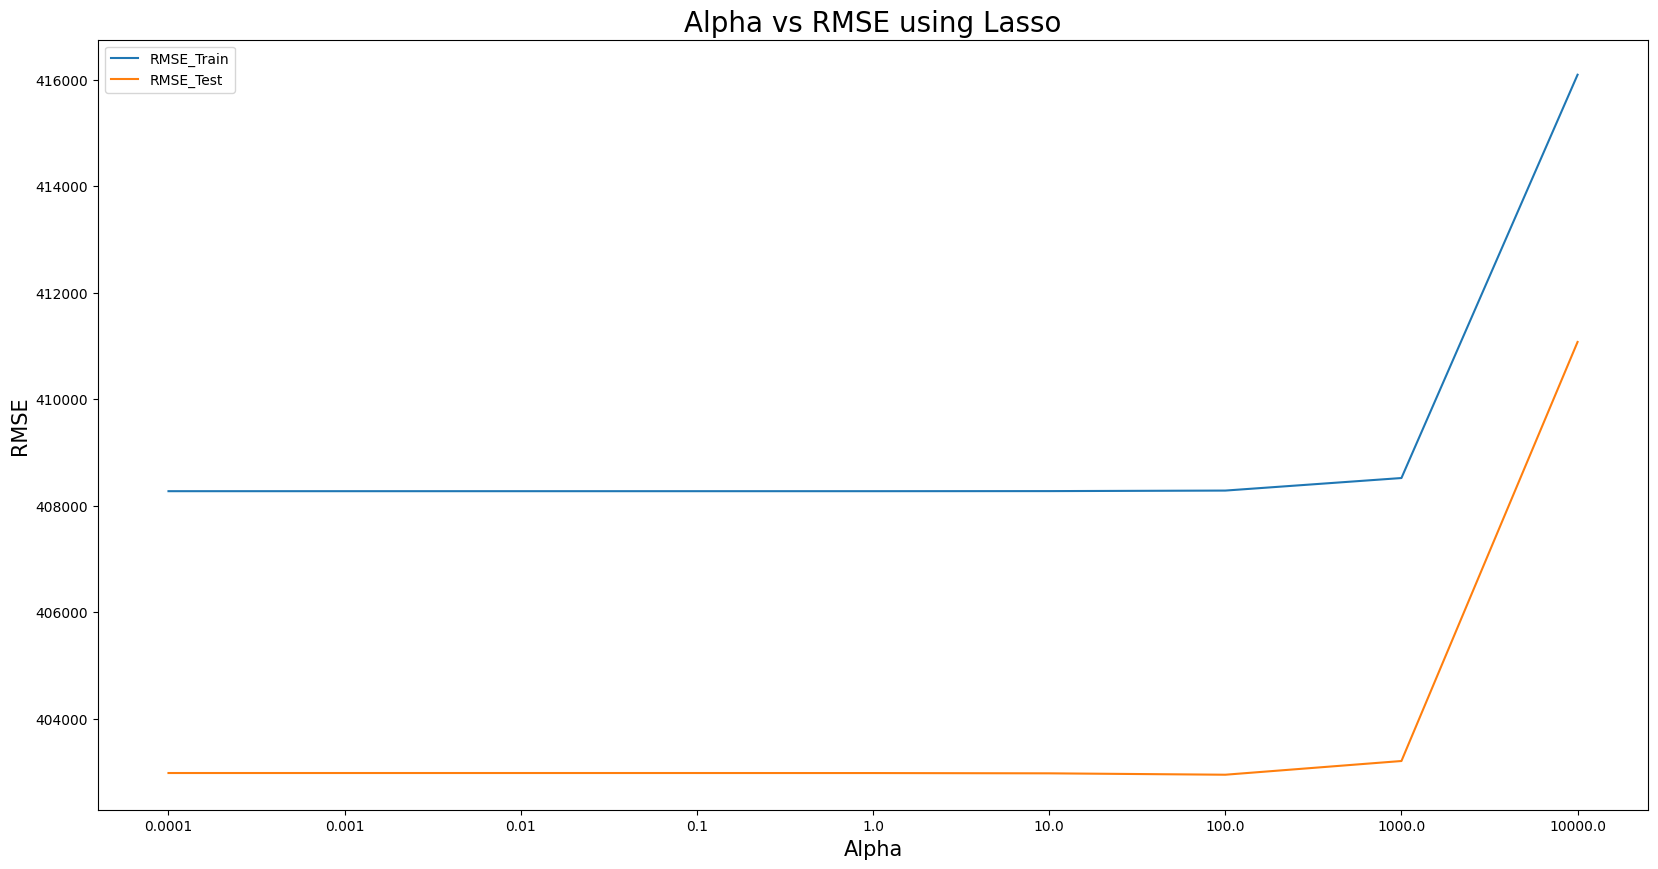

In [353]:
l_alpha = np.logspace(-4,4,9)
df_rmse = pd.DataFrame(columns=['Alpha', 'RMSE_Train','RMSE_Test'])
for i in l_alpha:
    model = Lasso(alpha=i)
    model.fit(X_train,Y_train)
    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test) 
    df_rmse.loc[len(df_rmse)] = {'Alpha': i, 'RMSE_Train': mean_squared_error(Y_train, Y_train_predict)**(0.5), 'RMSE_Test': mean_squared_error(Y_test, Y_test_predict)**(0.5)}

print(df_rmse)
plt.figure(figsize=(20,10))
sns.lineplot(data=df_rmse, x=range(len(df_rmse)), y='RMSE_Train', label='RMSE_Train')
sns.lineplot(data=df_rmse, x=range(len(df_rmse)), y='RMSE_Test', label='RMSE_Test')
plt.xticks(ticks=range(len(df_rmse)),labels=df_rmse['Alpha'], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Alpha', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('Alpha vs RMSE using Lasso', fontsize=20)
plt.show()

Model tidak overfitting (RMSE Train > RMSE Test), alpha yang baik dipakai yakni 10e-4 s.d. 10e3